# Exemple de Framework d'approche d'une analyse de données
- analyser les variables (intuitif)
    - données numériques / catgéorielles
    - regrouper les variables entre elles (spaciale, temporelle, etc...)
    - faire un commentaire sur la variable qui nous semblent importantes (à priori/intuitivement/hypothèses) pour le prix
- analyse de la variable cible
    - regarder sa distribution (histo)
    - calcule de valeurs types
    - relation visuelle entre variable cible et varibales supposées importantes.
- analyse globale:
    - matrice de corrélation puis analyse d'une sous-matrice de variables corrélées à SalePrice
    - conclusion intermédiaire
    - analyse profonde de relation entre ses variables (régressions)
- data cleaning : 
    - retirer les valeurs vides
    - les outliers
    - changer les catégorielles en numérique
    - standardisation
    - visualiser notre dataset via par exemple la PCA (code couleur qui montre la répartition des prix sur l'ensemble des maisons)

# Première étape
J'importe les librairies nécessaires pour analyser et travailler sur une dataframe

In [165]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data exploration

Dans un premier temps j'ouvre le fichier et commence à faire de premières analyses avec les fonctions describe() et info()<br>Pour une description des colonnes, on peut lire le fichier .txt

In [2]:
House_Prices = pd.read_csv('train.csv')
House_Prices.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [5]:
#House_Prices.columns

In [6]:
House_Prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

Cela nous permet d'identifier les variables qui ne semble pas significatives du fait du peu de données enregistrées.<br>
Les variables que l'on peut mettre de côté on entre 47% et 100% de données manquantes. Voici la liste:<br>
Alley, FireplaceQu, PoolQC, Fence, MiscFeature

In [7]:
House_Prices = House_Prices.drop(columns=['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)
House_Prices.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,6,2008,WD,Normal,147500


L'objectif étant d'analyser le comportement des données de ventes (SalePrice) on peut faire une analyse de cette variable avec la fonction .describes()

In [8]:
House_Prices.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Quelques observations:
- on a 1460 observations
- la médiane est de 163000 (avec une moyenne de 180921.19)
- la distance entre le prix de ventes min et max est particulière grande (min=34900;max=755000) --> 1ere supposition : il y a peut-etre des données extrêmes.


Faisons une analyse de la distibution des données

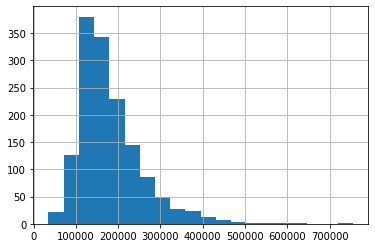

In [9]:
House_Prices.SalePrice.hist(bins=20)

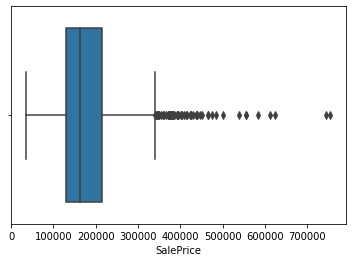

In [10]:
sns.boxplot(x=House_Prices['SalePrice'])

Dans le premier graphique, on voit qu'il y a un décalage vers la gauche de la distribution.<br> Le 2ème graph, permet de voir qu'il y a des données "extrêmes" parmi les prix forts. <br>Pour s'assurer de travailler sur une distribution normale, on peut choisir de supprimer les valeurs extrêmes (Outliers). <br>Une méthode qui peut être utilisée est celle du zscore

In [11]:
from scipy.stats import zscore
#The z-score is also useful to find outliers: a z-score value of +/- 3 is generally considered to be an outlier.
standardized = zscore(House_Prices['SalePrice'])
# Construct a Boolean Series to identify outliers: outliers
outliers = (standardized < -3) | (standardized > 3)

# Filter gapminder_2010 by the outliers: gm_outliers
House_Prices_outliers = House_Prices['SalePrice'].iloc[outliers].index.to_list()
#House_Prices_outliers

In [12]:
House_Prices = House_Prices.drop(House_Prices_outliers, axis =0)

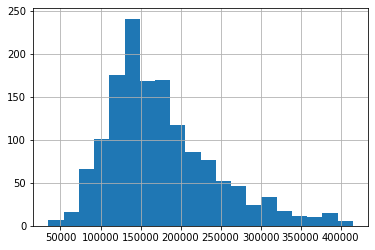

In [13]:
#House_Prices.SalePrice[1373]

House_Prices.SalePrice.hist(bins=20)

En supprimant les données extrêmes, on observe une distribution plus normale. On peut commencer à faire des analyses sans être trop "pollué" par ces dernières. 
A noter qu'il reste encore des prix de ventes très forts, les analyses suivantes nous aideront à éventuellement idenifier les causes de ces prix.

## Analyse des données numériques
### Identification des données numériques 
En utilisant la fonction .info(), on obeserve qu'il y a 3 types de données int, float et object. <br> pour faire une analyse des donneés numériques, je créé une df avec uniquement les colonnes ayant des valeurs numériques.<br>
Une méthode pour y parvenir "DataFrame.select_dtypes(self, include=None, exclude=None)"

In [14]:
House_Prices_num = House_Prices.select_dtypes(include=['int64','float64'])
House_Prices_num.head(3)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500


Commençons par faire une table de corrélation. Le but étant d'identifier dans cette 1ère analyse des variables qui peuvent avoir un effet sur les ventes.

In [15]:
House_Prices_num_corr = House_Prices_num.corr()
House_Prices_num_corr.SalePrice.sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.796343
GrLivArea        0.670485
GarageCars       0.651158
GarageArea       0.626092
TotalBsmtSF      0.582442
1stFlrSF         0.572255
YearBuilt        0.557339
FullBath         0.553524
YearRemodAdd     0.536864
GarageYrBlt      0.506608
TotRmsAbvGrd     0.487621
Fireplaces       0.465635
MasVnrArea       0.420717
LotFrontage      0.342167
BsmtFinSF1       0.341000
WoodDeckSF       0.330921
OpenPorchSF      0.313403
2ndFlrSF         0.287319
HalfBath         0.276652
LotArea          0.253476
BsmtFullBath     0.231469
BsmtUnfSF        0.216787
BedroomAbvGr     0.172871
ScreenPorch      0.092677
MoSold           0.081094
3SsnPorch        0.061720
PoolArea         0.036829
BsmtFinSF2      -0.004591
MiscVal         -0.018489
YrSold          -0.019633
BsmtHalfBath    -0.026684
Id              -0.028112
LowQualFinSF    -0.060149
OverallCond     -0.069833
MSSubClass      -0.082756
EnclosedPorch   -0.140363
KitchenAbvGr    -0.145244
Name: SalePr

Conceranant les corrélations négatives, étant très faible, on peut dire que ces varialbles n'influent pas négativement sur le prix de ventes.<br>
pour les corrélations positives, si on définit qu'une corrélation forte est supérieur à 50%, je sélectionne les variables suivantes: 
- OverallQual = Évalue le matériel et la finition de la maison de {1, 2, 3, 4, 5, 6, 7, 8, 9, 10}
- GrLivArea = Surface habitable au-dessus du niveau du sol (pieds carrés) = mesure numérique
- GarageCars = Taille du garage en capacité de la voiture de {0, 1, 2, 3, 4} --> catégorie
- GarageArea = Taille du garage en pieds carrés = mesure numérique
- TotalBsmtSF = Nombre total de pieds carrés de sous-sol = mesure numérique
- 1stFlrSF = Premier étage pieds carrés = mesure numérique
- YearBuilt = Année de construction = datetime
- FullBath = Salles de bain complètes au dessus du niveau de {0, 1, 2, 3} --> catégorie
- YearRemodAd = Date de remodelage (identique à la date de construction si aucun remodelage ou ajouts) = datetime
- GarageYrBlt = Année de construction du garage = datetime

A la vue de ces descriptions (qui aurait pu etre fait plus tôt), je vais retirer de ma liste de variables numériques : GarageCars et FullBath.
<br><br>TO-DO je fais un graph multiline entre les var choisi et le prix de ventes. puis explications. puis modèle (avec du random?) pour verifier si la relation est significative.

In [16]:
#House_Prices_num.columns.sort_values().to_list() 

Je choisis de faire plusieurs graphiques pour visualiser les relations des variables retenues sur le prix de ventes

In [17]:
House_Prices_num_retenues = House_Prices_num[['SalePrice','1stFlrSF', 'GarageArea', 'GarageYrBlt', 'GrLivArea', 'OverallQual', 'TotalBsmtSF', 'YearBuilt', 'YearRemodAdd']]

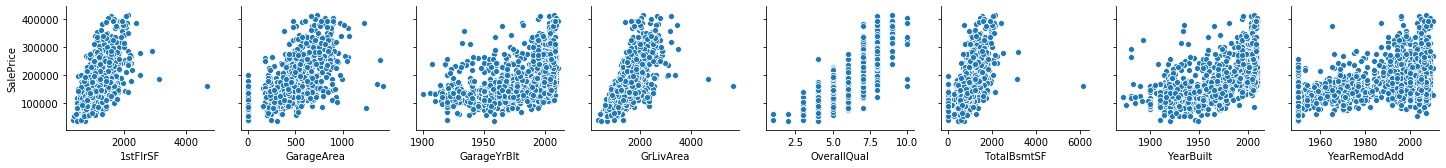

In [18]:
num = sns.pairplot(data=House_Prices_num_retenues,
                  y_vars=['SalePrice'],
                  x_vars=['1stFlrSF', 'GarageArea', 'GarageYrBlt', 'GrLivArea', 'OverallQual', 'TotalBsmtSF', 'YearBuilt', 'YearRemodAdd'])

### Commentaires:
nous savons déjà qu'il y a une corrélation entre ces variables et le prix de vente. 

pour rappel pour la variable SalePrice: 
- count      1460.000000
- mean     180921.195890
- std       79442.502883
- min       34900.000000
- 25%      129975.000000
- 50%      163000.000000
- 75%      214000.000000
- max      755000.000000

#### Surface:
- 1stFlrSF = Premier étage en squarefeet => plus la surface est importante plus le prix augmente. Mais, pour certaines maisons on constate que la grande surface n'engendre pas un prix fort, il est même pour un dans la moyenne.
- TotalBsmtSF = Nombre total de squarefeet en sous-sol = constat identique
- GrLivArea = Surface habitable au-dessus du niveau du sol (squarefeet) = impact sur le prix.

==> la limite de surface que l'on voit sur chacune de ces variables nous donne une indication sur la taille des maison de la zone géographique

#### Garage:
- GarageArea = Taille du garage en squarefeet => ne pas avoir de garage implique un prix qui ne dépasse pas une certain montant. Il sembel y avoir une surface limite qui au-delà n'engendre plus une hausse de prix. 

- GarageYrBlt = Année de construction du garage => ici par contre plus un garage est récent plus le prix est haut.

#### Evaluation quali de la maison:
- OverallQual = Évalue le matériel et la finition de la maison de {1, 2, 3, 4, 5, 6, 7, 8, 9, 10}


#### Année:
- YearBuilt = Année de construction = la récence du bien à un impact sur le prix, mais il y a des cas particliers pour des biens anciens (l'attrait pour l'ancien ou la maison a un charme particulier...)

- YearRemodAd = Date de remodelage (identique à la date de construction si aucun remodelage ou ajouts) => l'année de "remodelage" lui montre son influence sur le prix. il serait bon de regarder la corrélation avec la date de construction du bien.  

### Régression linéaire : étude des liens entre SalePrice (variable dépendante) et les variables indépendantes retenues
L'étude de la régression devrait permettre de juger de la qualité d’explication de la variable dépendante par les variables indépendantes.

In [19]:
## J'importe la librarie nécessaire pour construire le modèle de regression
import statsmodels.api as sm

## la variable cible (dependante) "SalePrice" est stockée dans Y
Y = House_Prices_num_retenues.SalePrice
X = sm.add_constant(House_Prices_num_retenues.drop('SalePrice', axis=1).fillna(0))

model = sm.OLS(Y, X).fit()

## les prédictions sont conservées dans "predictions"
predictions = model.predict(X) 

print_model = model.summary()

print(print_model)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     627.5
Date:                Fri, 27 Sep 2019   Prob (F-statistic):               0.00
Time:                        23:06:21   Log-Likelihood:                -16946.
No. Observations:                1438   AIC:                         3.391e+04
Df Residuals:                    1429   BIC:                         3.396e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.215e+06   1.02e+05    -11.962   

/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [20]:
#Commentaire des chiffres à faire : trouver les explications. 

### Représentation graphique de l'analyse de la régression linéaire

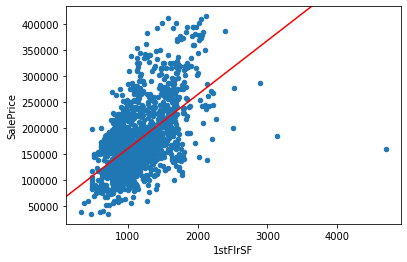

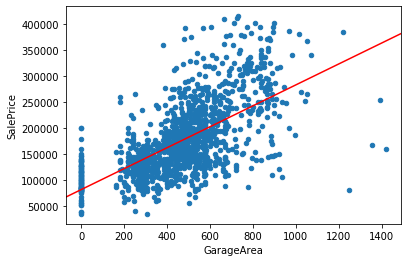

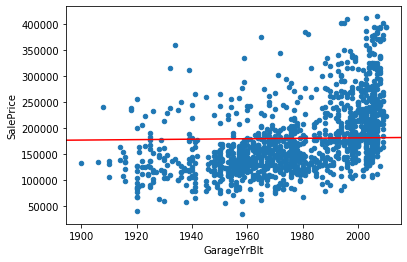

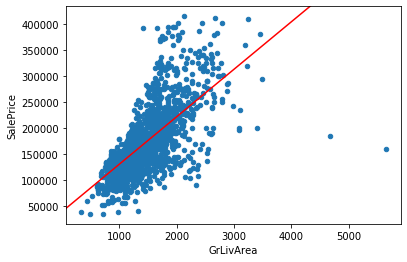

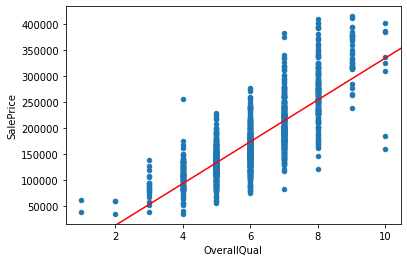

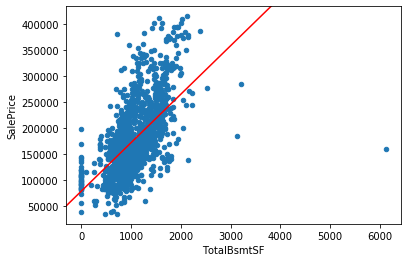

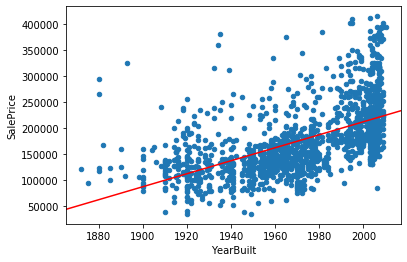

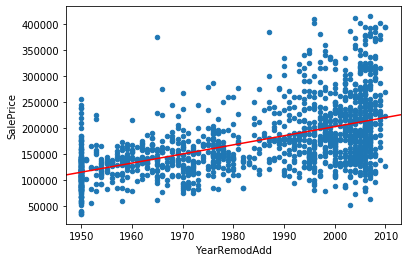

In [21]:
from statsmodels.graphics.regressionplots import abline_plot
df_var = House_Prices_num_retenues.drop('SalePrice', axis=1).fillna(0)

def GraphReg(var):
    ## la variable cible "SalePrice" est stockée dans Y
    Y =House_Prices_num_retenues.SalePrice
    
    X_var = df_var[var]

    # regress "expression" onto "motifScore" (plus an intercept)
    model = sm.OLS(Y, sm.add_constant(X_var))

    # scatter-plot data
    ax = House_Prices_num_retenues.plot(x=var, y='SalePrice', kind='scatter')

    # plot regression line
    abline_plot(model_results=model.fit(), ax=ax, color = 'red')
    
for var in df_var : 
    GraphReg(var)

### Corrélation des variables numériques retenues
A l'analyse des corrélations des variables numériques sur le prix, j'ai vu que par exemple avoir un garage et sa surface pouvait influer sur le prix de la maison. Analysons les corrélations entre ces valeurs numériques.

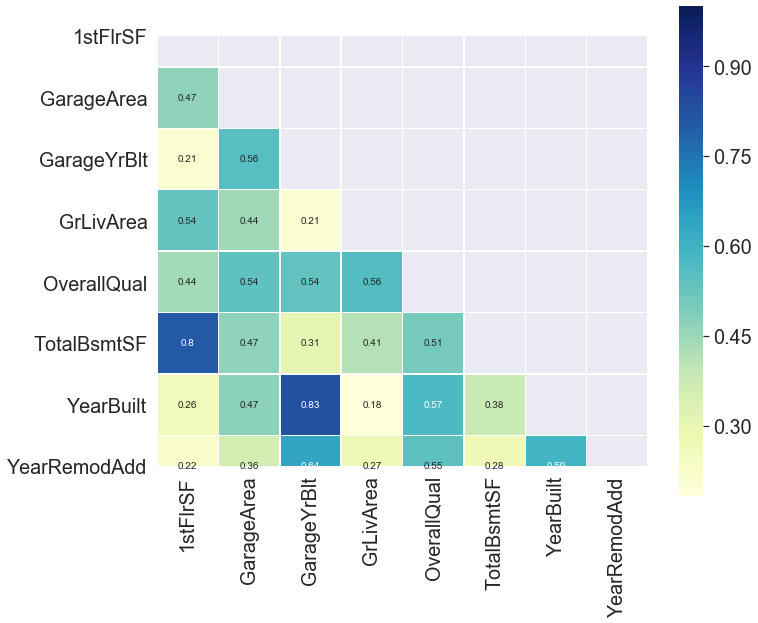

In [166]:
# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(11, 9))

# Compute the correlation matrix
corr = House_Prices_num_retenues.drop('SalePrice', axis=1).corr() # on a déjà examiné les corrélations avec SalePrice

# Generate a mask for the upper triangle
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap #
cmap="YlGnBu"

# Draw the heatmap with the mask and correct aspect ratio
ax = sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, annot_kws={"size": 10},square=True, linewidths=.5)

#square => pour obtenir des fornmes carré, cbar=> c'est l'échelle à droite, on peut déterminer sa taille (hauteur)
#linewidths=>pour l'épaisseur de trait entre chaque carré, cmap=>pour déterminer la palette de couleur

On remarque que la surface du sous-sol est fortement corrélé à celle de la surface du 1er etage.<br>
De même que pour l'année de construction de la maison avec l'année de construction du garage.On pourrait tester l'hypo de la relation d'une maison est construite avec 1 garage sur le prix de vente. --> voir plus bas.

In [168]:
#House_Prices.columns

### Analyse de l'option garage
Je cherche à analyser la relation qu'il peut y avoir entre le fait d'avoir une maison avec garage sur le prix de vente.

In [24]:
#House_Prices['YearBuilt-GarageYrBlt'] = House_Prices['YearBuilt'].astype(str)+'_'+House_Prices['GarageYrBlt'].fillna(0).astype(int).astype(str)

Je créé une première variable <b><i>yearsHouseGarage</i></b> qui permet d'identifier si le garage a été construit en même temps que la maison. Je fais cela en calculant la différence d'année entre la construction du garage par rapport à la construction de la maison.<br>
Je crée en parallèle une variable quali (catégorielle) <b><i>yearsHouseGarageCat</i></b> pour distinguer plus vite ces 4 cas.
    - si le résultat est 0 = on va supposer que le garage aura été construit temps. --> "Same"
    - si le résultat est positif = le garage aura été construit après. --> "After"
    - si le résultat est négatif = phénomène étrange mais peut-être que la garage aura été conservé et la maison construite autour. --> "Before"
    - dernier cas, la maison n'a pas de garage. --> "NoGarage"

In [25]:
House_Prices['yearsHouseGarage'] = House_Prices['GarageYrBlt'] - House_Prices['YearBuilt']
House_Prices['yearsHouseGarageCat'] = np.where(House_Prices['yearsHouseGarage']==0,'Same',
                                               (np.where(House_Prices['yearsHouseGarage']>0,'After',
                                                         np.where(House_Prices['yearsHouseGarage']<0,'Before',
                                                         'NoGarage'))))
House_Prices['yearsHouseGarageCat'].value_counts()

Same        1073
After        275
NoGarage      81
Before         9
Name: yearsHouseGarageCat, dtype: int64

#### Représenation graphique

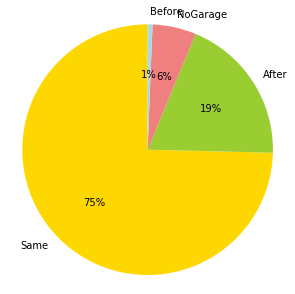

In [26]:
# Data to plot
fig = plt.figure(figsize=(5,5))
labels = 'Same', 'After', 'NoGarage','Before'
sizes = House_Prices['yearsHouseGarageCat'].value_counts().to_list()
colors = ['gold', 'yellowgreen', 'lightcoral','lightblue']
explode = (0, 0, 0,0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.0f%%', shadow=False, startangle=90)

plt.axis('equal')
plt.show()

On voit ici que les 3/4 des maisons vendues étaient construites avec un garage.<br>
Voyons la répartition des ventes pour chacune de ces catégories.

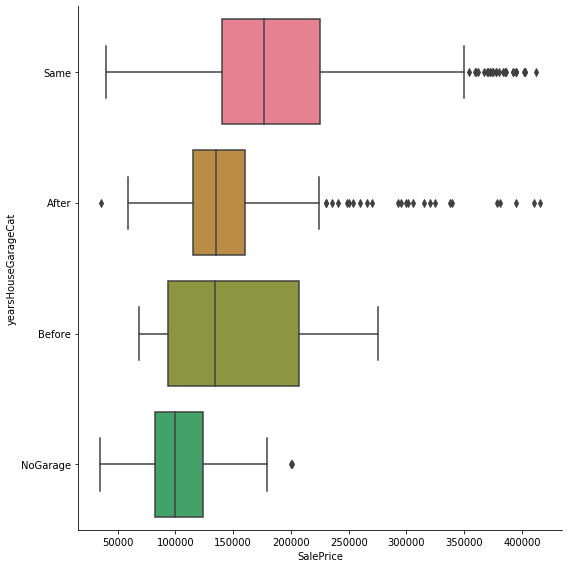

In [27]:
sns.catplot(x="SalePrice", y="yearsHouseGarageCat", kind="box", data=House_Prices, palette=sns.color_palette("husl", 8),height=8)

A la lecture de ce graph, on voit que prix median est le même pour les maisons dont le garage a été construit avant ou après la construction de la maison.<br>
Les maisons sans garage, se vendent moins cher, avec un prix de ventes maximum à pein plus haut que le prix médian des maisons avec garage.<br>
Les maisons avec garages ou dont le garage a été construit après ont un nombre conséquent de valeurs extrêmes vers la droite c'est à dire vers des prix très élevés. De plus, on constate que l'échelle de prix de vente pour les maison "After" est de la même taille que les maison "Same"<br>
    - On peut ici tester si les prix de ventes des maisons avec garage construit la même année (Same) sont plus haut les prix des maisons avec garage construit plus tard (After) (variables SalePrice et yearsHouseGarageCat). On va faire un test ANOVA pour répondre à cette question.

In [28]:
X = "yearsHouseGarageCat" # qualitative
Y = "SalePrice" # quantitative

with_garage=House_Prices[["Id","yearsHouseGarageCat","SalePrice"]].loc[(House_Prices["yearsHouseGarageCat"]=='Same') | (House_Prices["yearsHouseGarageCat"]=='After')]
#garage_same =with_garage=House_Prices[["Id","yearsHouseGarageCat","SalePrice"]].loc[House_Prices["yearsHouseGarageCat"]=='Same']
#garage_after =with_garage=House_Prices[["Id","yearsHouseGarageCat","SalePrice"]].loc[House_Prices["yearsHouseGarageCat"]=='After']
with_garage.head(3)

,Id,yearsHouseGarageCat,SalePrice
0,1,Same,208500
1,2,Same,181500
2,3,Same,223500


In [29]:
#garage_same.columns=["Id",'yearsHouseGarageCat','Same']
#garage_same

In [30]:
#with_garage.set_index('Id',inplace=False) .unstack()

In [31]:
with_garage_gp = with_garage.groupby(['Id','yearsHouseGarageCat']).agg({'SalePrice':'sum'})
with_garage_gp.head(3)

,,SalePrice
Id,yearsHouseGarageCat,
1,Same,208500
2,Same,181500
3,Same,223500


In [32]:
with_garage_gp = with_garage_gp.pivot_table(with_garage_gp,index='Id', columns='yearsHouseGarageCat').xs('SalePrice', axis=1, drop_level=True).fillna(0)
with_garage_gp.head(3)
#df = df.xs('a', axis=1, drop_level=True)

yearsHouseGarageCat,After,Same
Id,,
1,0.0,208500.0
2,0.0,181500.0
3,0.0,223500.0


In [33]:
from scipy.stats import f_oneway
f_oneway(with_garage_gp['After'],with_garage_gp['Same'])

F_onewayResult(statistic=1425.8924857856066, pvalue=8.148324775398006e-251)

In [34]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('SalePrice ~ C(yearsHouseGarageCat)', data=with_garage).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(yearsHouseGarageCat),3.446752e+11,1.0,82.651979,3.411165e-19
Residual,5.613087e+12,1346.0,NaN,NaN


In [35]:
#Le résultat

## Autres Analyses possibles : Analyse des données catégorielles
1ère étape : sélection des variables qualitatives.

In [169]:
House_Prices_cat = House_Prices.select_dtypes(include=['object'])
House_Prices_cat.head(3)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,yearsHouseGarageCat
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,Same
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,Same
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,Same


J'y ajoute les deux variables qui soit-disant numériques sont en fait indications catégorielles : GarageCars & FullBath 

In [170]:
House_Prices_cat = House_Prices_cat.merge(House_Prices[['GarageCars','FullBath']], left_index=True, right_index=True)

#### Graphique : Prix de ventes en foncton du Nb de salle de bain

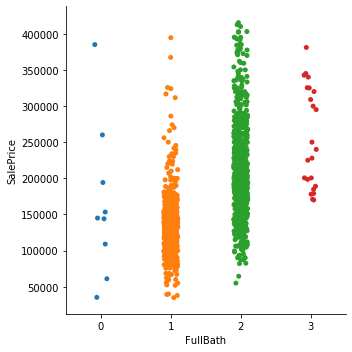

In [38]:
sns.catplot(x="FullBath", y="SalePrice", data=House_Prices)

On voit à l'aide de ce graphique que le nombre de salles de bain présentes dans une maison a une incidence sur le prix de ventes. 
* Les prix débutent à 50k pour les maisons avec une seule salle de bain. 
* Quand il y a 2 salles de bain, le prix minimal est de 100k. 
* Et quand il y en a 3, le prix minimal est entre 150k et 200k.

#### Graphiques de distribution par variable
Objectifs : repérer les tendances fortes des caractéristiques des maisons vendues.

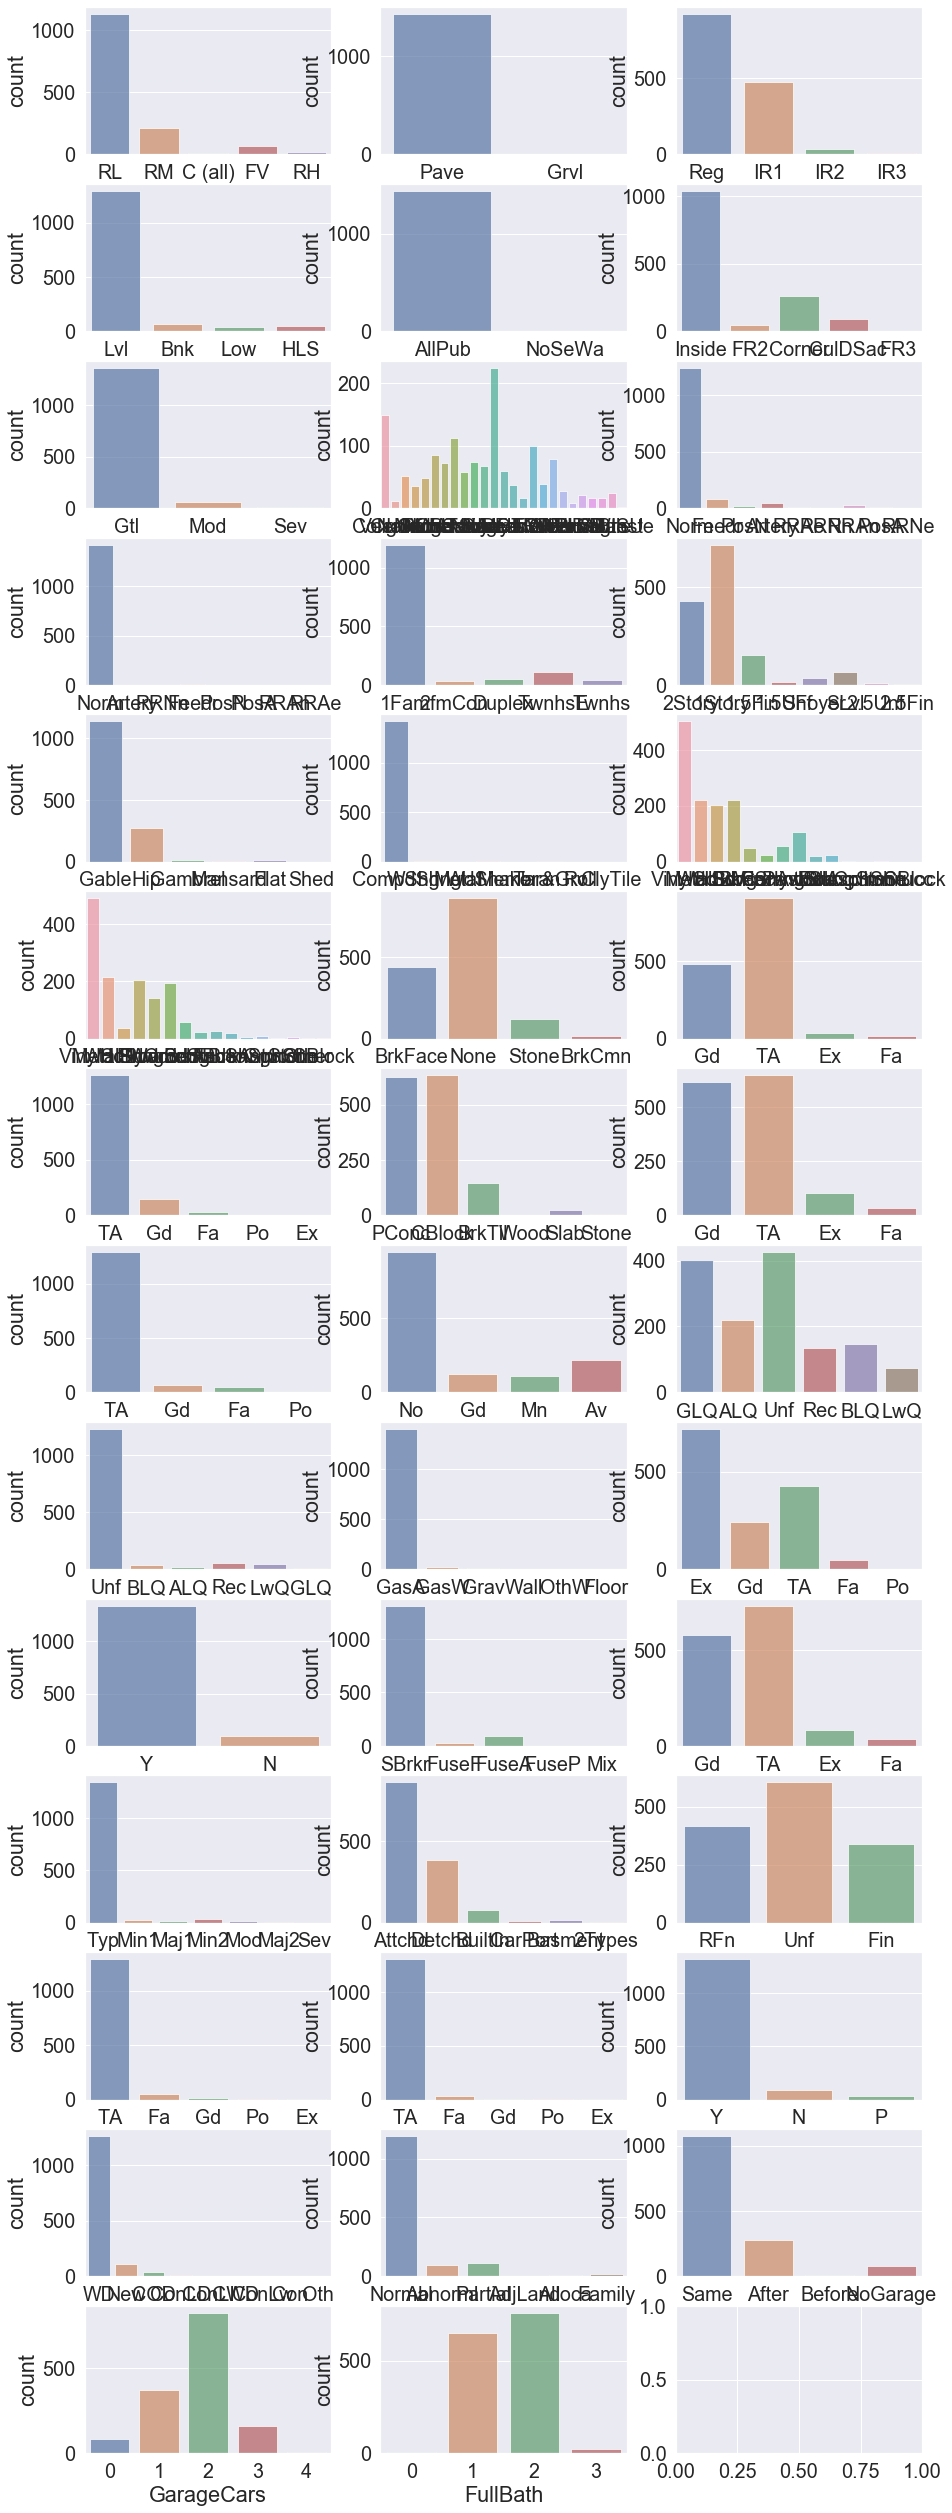

In [172]:
taille = len(House_Prices_cat.columns)
fig, axes = plt.subplots(round(taille/3),3 ,figsize=(15, 45))

for i, ax in enumerate(fig.axes):
    if i < taille:
        sns.countplot(x=House_Prices_cat.columns[i],alpha = 0.7,data=House_Prices_cat, ax=ax)

## Maison aux comportements atypiques : les outliers
Je recherche les maisons dont le comportement est atypique d'après les graph de la partie analyse de variables numériques. Par exemple, pour la variable '1stFlrSF', on voit que pour certaines maison une grande surface n'engendre pas un prix de ventes élevés.
Je vais identifier les outliers une fois de plus.

In [40]:
#The z-score is also useful to find outliers: a z-score value of +/- 3 is generally considered to be an outlier.
atypical_houses= []
atypical_houses_num= House_Prices_num[['Id','SalePrice','1stFlrSF', 'GarageArea', 'GarageYrBlt', 'GrLivArea', 'OverallQual', 'TotalBsmtSF', 'YearBuilt', 'YearRemodAdd']]
for out in House_Prices_num_retenues.drop('SalePrice', axis=1).columns.to_list():
    standardized_num = zscore(House_Prices_num_retenues[out])
    # Construct a Boolean Series to identify outliers: outliers
    outliers_num = (standardized_num > 3)
    # Filter by the outliers: 
    House_Prices_num_retenues_outliers = House_Prices_num_retenues[out].iloc[outliers_num].index.to_list()
    atypical_houses.append(House_Prices_num_retenues_outliers)
    #print(out, ": ",House_Prices_num_retenues_outliers)
    #House_Prices_outliers

#Je crée un liste d'index unique.
atypical_houses = set([j for i in atypical_houses for j in i])
#afin de retrouver toutes les caractéristiques des maisons atypiques dans ma base d'origine, 
    #je crée une liste des Id (identifiant de chaque maison)
atypical_houses_id = [atypical_houses_num['Id'].iloc[out] for out in atypical_houses]
atypical_houses_id

House_Prices_Atyp = House_Prices[House_Prices.index.isin(atypical_houses_id)]
House_Prices_Atyp.head(3)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,yearsHouseGarage,yearsHouseGarageCat
120,121,80,RL,NaN,21453,Pave,IR1,Low,AllPub,CulDSac,...,0,0,0,10,2006,WD,Normal,180000,0.0,Same
201,202,20,RL,75.0,10125,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,2,2008,WD,Normal,171500,3.0,After
228,229,20,RL,70.0,8521,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,5,2010,WD,Normal,125000,7.0,After


J'ai choisi d'analyser la distribution des variables quali afin d'identifier d'éventuelles 
points communs.

In [41]:
#Dans un premier temps j'isole des les variables catgégorielles.
House_Prices_Atyp_cat = House_Prices.select_dtypes(include=['object'])
House_Prices_Atyp_cat.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition', 'yearsHouseGarageCat'],
      dtype='object')

In [42]:
House_Prices_Atyp_cat.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,yearsHouseGarageCat
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,Same
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,Same
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,Same
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml,After
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,Same


#### Graphiques de distribution

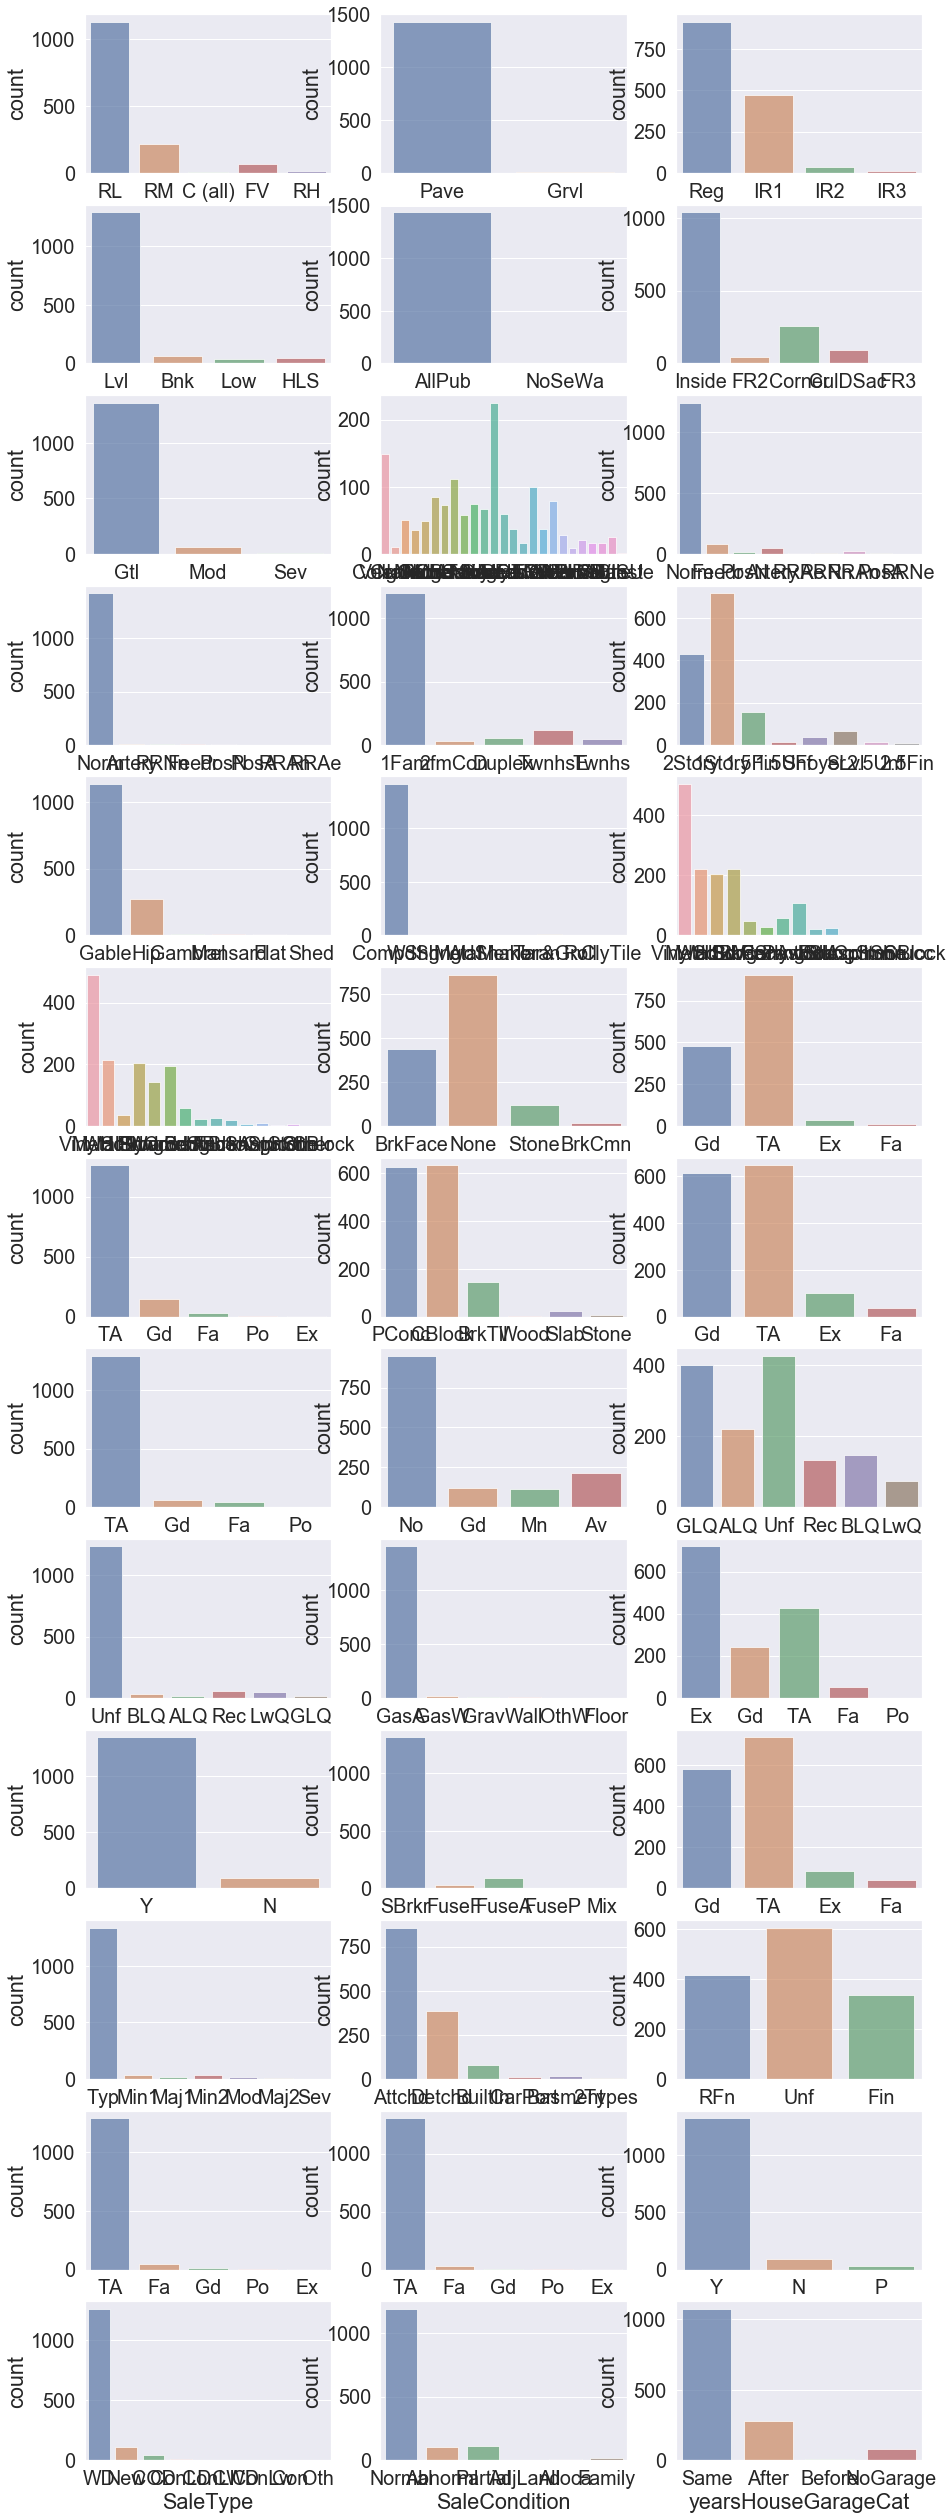

In [174]:
taille = len(House_Prices_Atyp_cat.columns)
fig, axes = plt.subplots(round(taille/3),3 ,figsize=(15, 45))

for i, ax in enumerate(fig.axes):
    if i < taille:
        sns.countplot(x=House_Prices_Atyp_cat.columns[i],alpha = 0.7,data=House_Prices_Atyp_cat, ax=ax)

A l'analyse de ces graphiques, on voit que concernant le voisinage (Variable 'Neighborhood'), il y a 4 quartiers se distinguent.<br>
Sélectionnons-les.

In [175]:
House_Prices_Atyp_cat.Neighborhood.value_counts().head(4)

NAmes      225
CollgCr    149
OldTown    112
Edwards    100
Name: Neighborhood, dtype: int64

### Relation choix du quartier et type de logement
Je vais tester la relation entre les 4 quartiers sélectionnés et le type de logement (BldgType: Type of dwelling)

       1Fam : Single-family Detached	
       2FmCon : Two-family Conversion; originally built as one-family dwelling
       Duplx : Duplex
       TwnhsE : Townhouse End Unit
       TwnhsI : Townhouse Inside Unit

J'isole d'abord les colonnes qui m'intéresse et filtre sur les quartiers à analyser.

In [176]:
rela=House_Prices_Atyp_cat[['Neighborhood','BldgType']]
rela = rela[rela.Neighborhood.isin(['NAmes','CollgCr','OldTown','Edwards'])]
rela.Neighborhood.value_counts(),rela.BldgType.value_counts()

(NAmes      225
 CollgCr    149
 OldTown    112
 Edwards    100
 Name: Neighborhood, dtype: int64, 1Fam      520
 Duplex     28
 2fmCon     19
 TwnhsE     16
 Twnhs       3
 Name: BldgType, dtype: int64)

Cherchant à connaître la relation entre le quartier où se trouve la maison et le type de cette dernière, je vais utiliser le test du Chi-2.

<b>Les hypothèses</b>
- H0: il n'y a pas de relation statistique entre les deux variables.
- H1: il y a une relation statistique entre les deux variables.<br>

Construction de la table de contingence avec la fonction pd.crosstab().<br>
On aura ainsi une table de fréquence des données.

In [159]:
contingency_table = pd.crosstab(
    rela['Neighborhood'],
    rela['BldgType'],
    margins = False)
contingency_table

BldgType,1Fam,2fmCon,Duplex,Twnhs,TwnhsE
Neighborhood,,,,,
CollgCr,139,0,0,0,10
Edwards,81,4,8,3,4
NAmes,205,1,17,0,2
OldTown,95,14,3,0,0


On a donc pour chaque cellule, la fréquence du croisement des variables. Par exemple, on compte 17 maison de type Duplex dans le quartier North Ames (NAmes).

Visualisation de la table de contingence avec un graphique de type histogramme empilé.

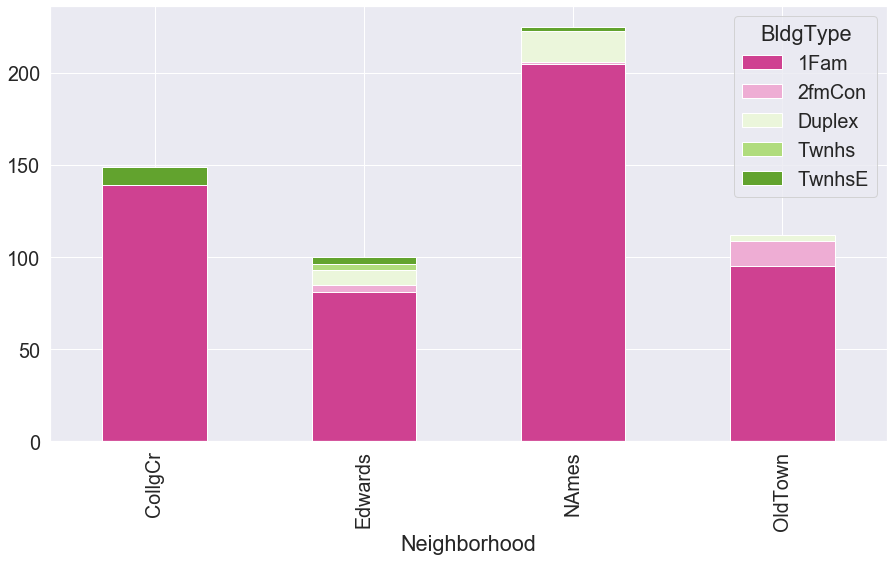

In [160]:
from matplotlib.colors import ListedColormap
contingency_table.plot(kind='bar', stacked=True,
              colormap=ListedColormap(sns.color_palette("PiYG")), 
              figsize=(15,8))

Le graphique montre que pour les maisons au prix de ventes considérées comme extrême (les outliers), pour les quartiers sélectionnés, ce sont les maisons familiales qui sont plébiscitées, puis les duplex, notamment à North Ames.

Le test du Chi-2 avec Scipy

In [163]:
f_obs = np.array([contingency_table.iloc[0][0:5].values,
                  contingency_table.iloc[1][0:5].values,
                  contingency_table.iloc[2][0:5].values,
                  contingency_table.iloc[3][0:5].values])
f_obs

array([[139,   0,   0,   0,  10],
       [ 81,   4,   8,   3,   4],
       [205,   1,  17,   0,   2],
       [ 95,  14,   3,   0,   0]])

In [164]:
from scipy import stats
stats.chi2_contingency(f_obs)[0:3]

(85.03365457771794, 4.4841391991493293e-13, 12)

Résultats : 
- X2 = ~85
- p-value = ~0 
- degrees of freedom = 12

Conclusions : 
Avec une p-value < 0.05 , je peux rejeter l'hypothèse nulle (H0). Il y a bien une relation entre le type de quartier et le type d'habitation. Ces 2 variables ne sont pas indépendantes l'une de l'autre.